# Clase 8 – Visualización con Python (Matplotlib + Seaborn)

Este cuaderno complementa la Clase 8 y muestra **paso a paso** cómo construir visualizaciones con
**Matplotlib** y **Seaborn** usando un dataset de E-commerce (continuación de la Clase 7).

Incluye: líneas (evolución), barras (eficiencia), dispersión (relación) y heatmap (correlaciones),
además de prácticas recomendadas.


## 1) Instalación (opcional) e importaciones

Si ejecutas localmente y no tienes las librerías, descomenta la celda de instalación.


In [1]:
# ¡Ejecuta esta celda solo si te falta alguna librería!
# %pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para que los gráficos aparezcan en el notebook
%matplotlib inline

# Opcional: estilo básico de seaborn (no obligatorio)
sns.set()


## 2) Crear el dataset base (5 meses)

Datos consistentes con el ejercicio de la Clase 7.


In [2]:
data = {
    'Mes': ['Ene','Feb','Mar','Abr','May'],
    'Ventas': [45000, 52000, 38000, 61000, 48000],
    'Visitantes': [15000, 18200, 12500, 20500, 16800],
    'Publicidad': [8500, 9800, 7200, 11200, 9500],
}
df = pd.DataFrame(data)
df['Eficiencia'] = df['Ventas'] / df['Publicidad']  # métrica para barras
df


,Mes,Ventas,Visitantes,Publicidad,Eficiencia
0,Ene,45000,15000,8500,5.294118
1,Feb,52000,18200,9800,5.306122
2,Mar,38000,12500,7200,5.277778
3,Abr,61000,20500,11200,5.446429
4,May,48000,16800,9500,5.052632


## 3) Línea – Evolución de Ventas mensuales
**Cuándo usarlo:** evolución temporal / tendencias.

**Buenas prácticas:** título claro, ejes con unidades.


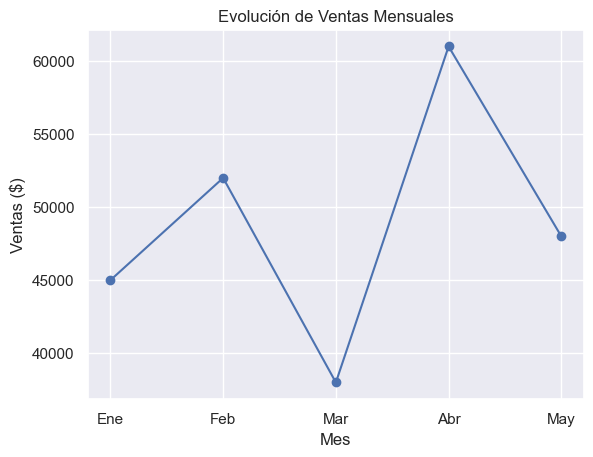

Ventas con pico en Abril; caída en Marzo vs Febrero.


In [3]:
plt.figure()
plt.plot(df['Mes'], df['Ventas'], marker='o')
plt.title('Evolución de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.show()

# Interpretación breve
print('Ventas con pico en Abril; caída en Marzo vs Febrero.')


## 4) Barras – Eficiencia publicitaria (Ventas / Gasto)
**Cuándo usarlo:** comparación categórica entre meses.

**Nota:** Eficiencia mayor = más ventas por cada unidad monetaria invertida en publicidad.


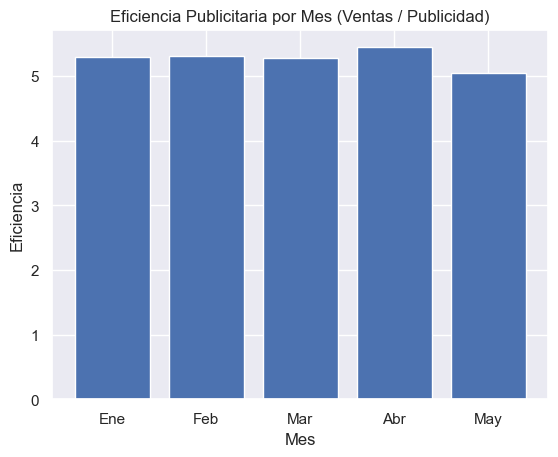

Mes más eficiente: Abr


In [4]:
plt.figure()
plt.bar(df['Mes'], df['Eficiencia'])
plt.title('Eficiencia Publicitaria por Mes (Ventas / Publicidad)')
plt.xlabel('Mes')
plt.ylabel('Eficiencia')
plt.show()

print('Mes más eficiente:', df.loc[df['Eficiencia'].idxmax(), 'Mes'])


## 5) Dispersión – Relación Visitantes vs Ventas
**Cuándo usarlo:** relación entre variables / correlaciones.

**Tips:** agregar títulos y etiquetas; opcionalmente ajustar transparencia si hay mucha superposición.


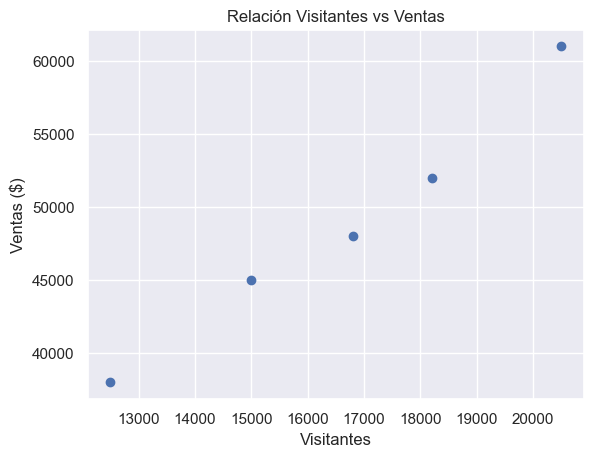

Correlación Visitantes–Ventas: 0.9896


In [5]:
plt.figure()
plt.scatter(df['Visitantes'], df['Ventas'])
plt.title('Relación Visitantes vs Ventas')
plt.xlabel('Visitantes')
plt.ylabel('Ventas ($)')
plt.show()

print('Correlación Visitantes–Ventas:', round(df[['Visitantes','Ventas']].corr().iloc[0,1], 4))


## 6) Heatmap de correlaciones (Seaborn)
**Cuándo usarlo:** revisar la matriz de correlaciones de varias variables a la vez.

**Buenas prácticas:** mostrar `annot=True` para ver los números; revisar escalas y coherencia.


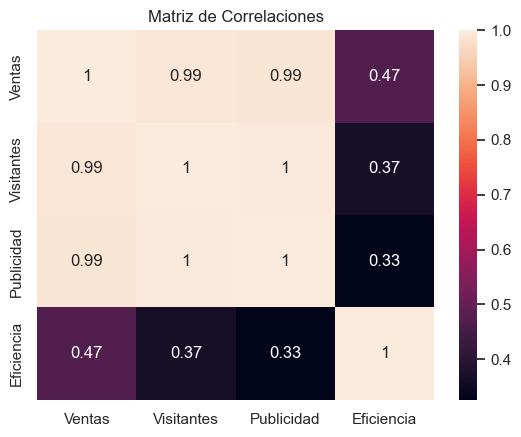

Observa relación positiva fuerte entre Visitantes y Ventas; Eficiencia puede variar por gasto.


In [6]:
plt.figure()
sns.heatmap(df[['Ventas','Visitantes','Publicidad','Eficiencia']].corr(), annot=True)
plt.title('Matriz de Correlaciones')
plt.show()

print('Observa relación positiva fuerte entre Visitantes y Ventas; Eficiencia puede variar por gasto.')


## 7) Extra – Histogramas rápidos (distribución)
**Cuándo usarlo:** distribución y detección de valores atípicos.

Usamos Matplotlib directo; un gráfico por celda para mantener la claridad.


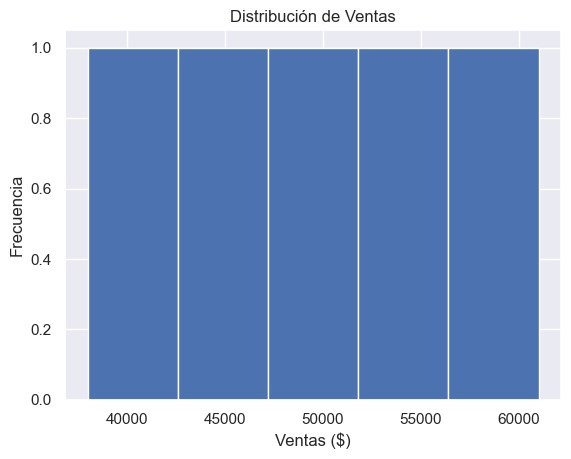

Revisa si hay concentración de ventas en torno a ciertos rangos y posibles outliers.


In [7]:
plt.figure()
plt.hist(df['Ventas'], bins=5)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas ($)')
plt.ylabel('Frecuencia')
plt.show()

print('Revisa si hay concentración de ventas en torno a ciertos rangos y posibles outliers.')


## 8) Guardar figuras (opcional)
Ejemplo para exportar a PNG/PDF. Vuelve a dibujar o guarda justo después de crear cada gráfico.
Las rutas relativas guardan al lado del notebook.


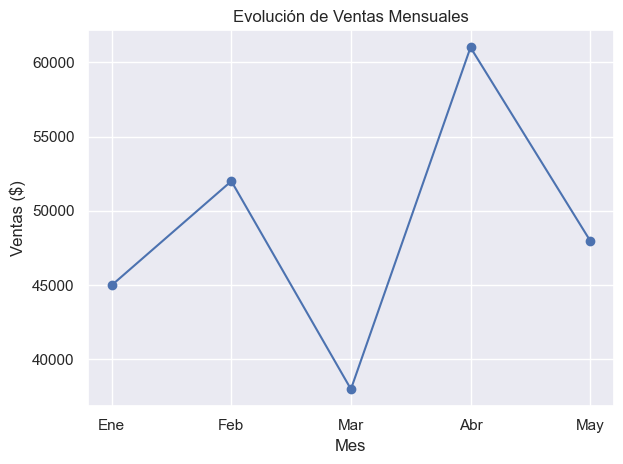

Figura guardada como ventas_mensuales.png


In [8]:
# Ejemplo de guardado tras regenerar un gráfico simple:
plt.figure()
plt.plot(df['Mes'], df['Ventas'], marker='o')
plt.title('Evolución de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.tight_layout()
plt.savefig('ventas_mensuales.png', dpi=150)
plt.show()

print('Figura guardada como ventas_mensuales.png')
